# Credit Card Fraudulent Detection

## Scenario 
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

## Dataset
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

## Important : Performance metric
- In case of fraud detection case studies, predicting a positive point as negative points will cost a lot more than predicting negative points as positive data points. 
- Since the dataset is highly imbalanced 'Accuracy' is not a good metric
- Highly imbalanced data and cost of errors is so different, so AUC is useless here. 
- Balancing the dataset and use accuracy will solve the issue of data imbalanced but it won’t solve cost of error difference.
- Both Precision and Recall measure wrt positive points, And F1 score is the harmonic mean of Precision and Recall. These metrices can resolve cost of error problem.

### Importing dataset and initial analysis

In [2]:
import pandas as pd
df = pd.read_csv('./creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
df.shape

(284807, 31)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### check for missing values

In [8]:
df.isna().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

### Feature importance

<AxesSubplot:title={'center':'Correlation with class'}>

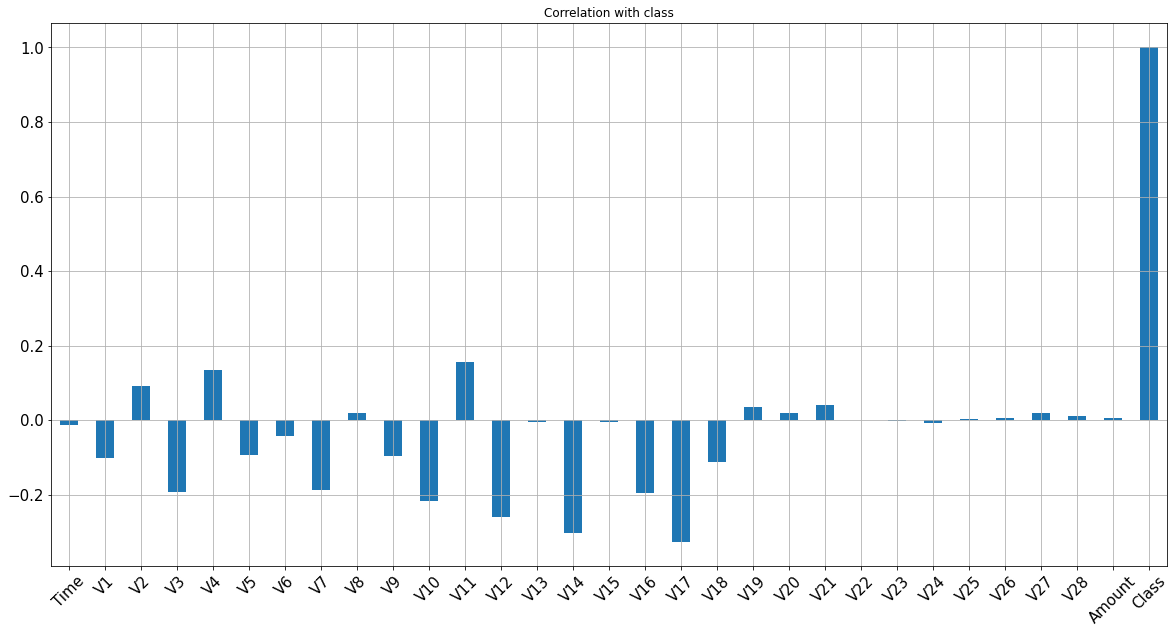

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

df.corrwith(df.Class).plot.bar(
        figsize = (20, 10), title = "Correlation with class", fontsize = 15,
        rot = 45, grid = True)

<ipython-input-32-91e0c708315b>:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<AxesSubplot:>

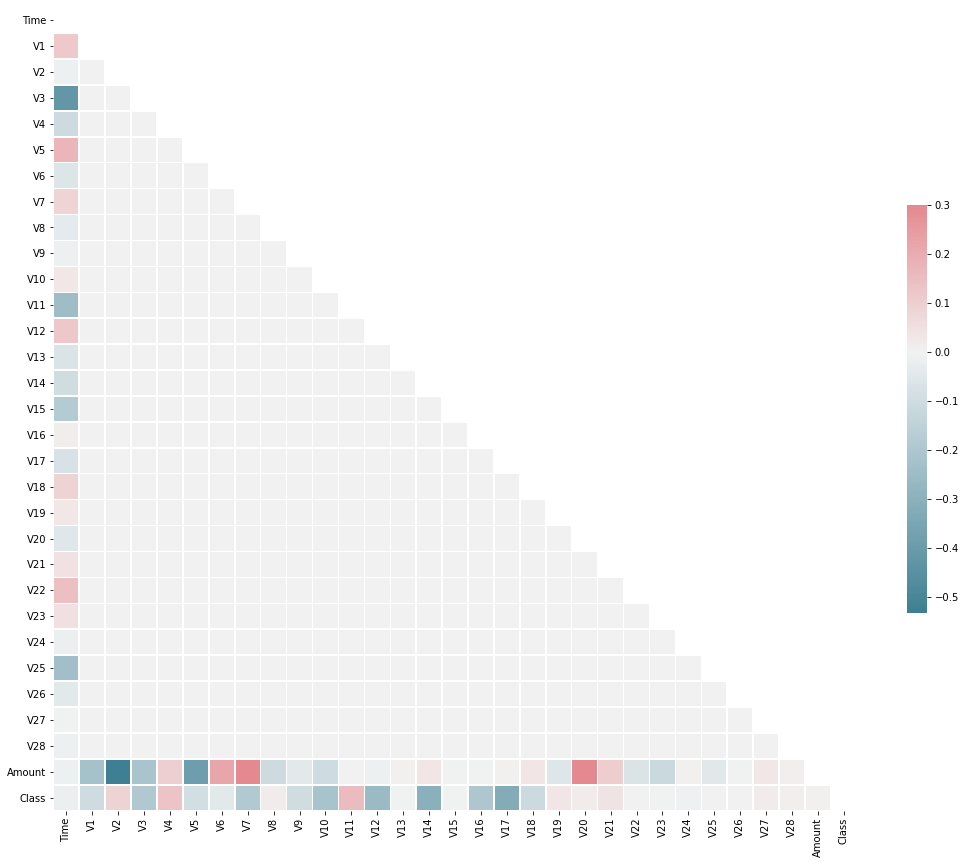

In [32]:
# Generate correlation heatmap
import numpy as np

corr = df.corr()
# Generate a mask for the upper symmetry of correlation matrix
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [39]:
# will drop time feature before feature scaling
df = df.drop(['Time'],axis=1)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284807 non-null  float64
 1   V2      284807 non-null  float64
 2   V3      284807 non-null  float64
 3   V4      284807 non-null  float64
 4   V5      284807 non-null  float64
 5   V6      284807 non-null  float64
 6   V7      284807 non-null  float64
 7   V8      284807 non-null  float64
 8   V9      284807 non-null  float64
 9   V10     284807 non-null  float64
 10  V11     284807 non-null  float64
 11  V12     284807 non-null  float64
 12  V13     284807 non-null  float64
 13  V14     284807 non-null  float64
 14  V15     284807 non-null  float64
 15  V16     284807 non-null  float64
 16  V17     284807 non-null  float64
 17  V18     284807 non-null  float64
 18  V19     284807 non-null  float64
 19  V20     284807 non-null  float64
 20  V21     284807 non-null  float64
 21  V22     28

### Splitting the dataset before feature analysis

In [41]:
#### Dividing Independent and Dependent Features
X=df.drop("Class",axis=1)
y=df.Class

In [42]:
print(X.shape)
print(y.shape)

(284807, 29)
(284807,)


In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7)

In [63]:
X_test.shape

(85443, 29)

### Feature Scaling

In [14]:
print(df.max())

Time      172792.000000
V1             2.454930
V2            22.057729
V3             9.382558
V4            16.875344
V5            34.801666
V6            73.301626
V7           120.589494
V8            20.007208
V9            15.594995
V10           23.745136
V11           12.018913
V12            7.848392
V13            7.126883
V14           10.526766
V15            8.877742
V16           17.315112
V17            9.253526
V18            5.041069
V19            5.591971
V20           39.420904
V21           27.202839
V22           10.503090
V23           22.528412
V24            4.584549
V25            7.519589
V26            3.517346
V27           31.612198
V28           33.847808
Amount     25691.160000
Class          1.000000
dtype: float64


In [15]:
print(df.min())

Time        0.000000
V1        -56.407510
V2        -72.715728
V3        -48.325589
V4         -5.683171
V5       -113.743307
V6        -26.160506
V7        -43.557242
V8        -73.216718
V9        -13.434066
V10       -24.588262
V11        -4.797473
V12       -18.683715
V13        -5.791881
V14       -19.214325
V15        -4.498945
V16       -14.129855
V17       -25.162799
V18        -9.498746
V19        -7.213527
V20       -54.497720
V21       -34.830382
V22       -10.933144
V23       -44.807735
V24        -2.836627
V25       -10.295397
V26        -2.604551
V27       -22.565679
V28       -15.430084
Amount      0.000000
Class       0.000000
dtype: float64


In [44]:
# Standardizing

from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()

In [45]:
X_train_scaled=scalar.fit_transform(X_train)
X_test_scaled=scalar.transform(X_test)

In [47]:
X_train_scaled[0]

array([-0.5938552 ,  0.53482553, -1.1912596 , -2.06077198,  1.4226842 ,
        2.0001791 , -0.17333777,  1.28154918,  0.46254207, -1.52246882,
       -0.73529731,  0.63397984, -0.23147847,  0.94045669,  0.03757182,
       -0.44327396, -0.39698295,  0.36882195,  0.63585533, -0.255457  ,
        0.16974584,  0.32415615, -0.25755749,  1.69779321,  0.2257132 ,
       -1.68311164,  0.22265235,  0.21191451, -0.248296  ])

### Model training

In [54]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score,recall_score,f1_score

Nearest Neighbors
Model Performance of training set
- F1 Score : 0.9995
- Precision : 0.9495
- Recall : 0.7966
-----------------------------------
Model Performance of test set
- F1 Score : 0.9996
- Precision : 0.9244
- Recall : 0.7971


Linear SVM
Model Performance of training set
- F1 Score : 0.9993
- Precision : 0.8389
- Recall : 0.7797
-----------------------------------
Model Performance of test set
- F1 Score : 0.9995
- Precision : 0.8603
- Recall : 0.8478


RBF SVM
Model Performance of training set
- F1 Score : 0.9996
- Precision : 0.9703
- Recall : 0.8305
-----------------------------------
Model Performance of test set
- F1 Score : 0.9994
- Precision : 0.9794
- Recall : 0.6884


Decision Tree
Model Performance of training set
- F1 Score : 1.0000
- Precision : 1.0000
- Recall : 1.0000
-----------------------------------
Model Performance of test set
- F1 Score : 0.9992
- Precision : 0.7365
- Recall : 0.7899


Random Forest
Model Performance of training set
- F1 Score : 1.0000
-

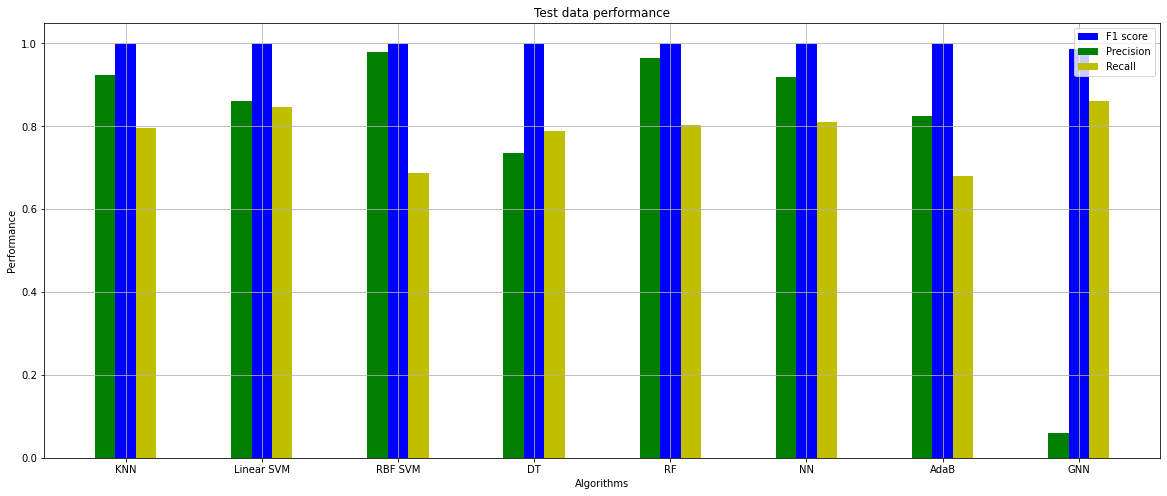

In [55]:
h = .02  # step size in the mesh
metrics = np.zeros((8,3))

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM",
         "Decision Tree", "Random Forest", "Neural Network", "AdaBoost",
         "Naive Bayes"]

models = {
    "Nearest Neighbors" : KNeighborsClassifier(), 
    "Linear SVM" : SVC(kernel="linear"), 
    "RBF SVM" : SVC(),
    "Decision Tree" : DecisionTreeClassifier(), 
    "Random Forest" : RandomForestClassifier(), 
    "Neural Net" : MLPClassifier(), 
    "AdaBoost" : AdaBoostClassifier(),
    "Naive Bayes" : GaussianNB()
}


for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train_scaled,y_train)
    # Make predictions
    y_train_pred= model.predict(X_train_scaled)
    y_test_pred= model.predict(X_test_scaled)
    
    # training performances
    train_f1 = f1_score(y_train,y_train_pred,average='weighted')
    train_precision= precision_score(y_train,y_train_pred)
    train_recall= recall_score(y_train,y_train_pred)
    
    #test data performance
    test_f1 = f1_score(y_test,y_test_pred,average='weighted')
    test_precision= precision_score(y_test,y_test_pred)
    test_recall= recall_score(y_test,y_test_pred)
        
    metrics[i,:]= [test_f1,test_precision,test_recall]
    
    print (list(models.keys())[i])
    
    print ("Model Performance of training set")
    print ("- F1 Score : {:.4f}".format(train_f1))
    print ("- Precision : {:.4f}".format(train_precision))
    print ("- Recall : {:.4f}".format(train_recall))
    
    print ('-'*35)
    
    print ("Model Performance of test set")
    print ("- F1 Score : {:.4f}".format(test_f1))
    print ("- Precision : {:.4f}".format(test_precision))
    print ("- Recall : {:.4f}".format(test_recall))
           
    print('='*35)
    print('\n')
    
a=np.arange(8)
w=0.15
fig,ax=plt.subplots(figsize=(20,8),edgecolor='k')
p1=ax.bar(a,metrics[:,0],w,color='b')
p2=ax.bar(a-w,metrics[:,1],w,color='g')
p3=ax.bar(a+w,metrics[:,2],w,color='y')
ax.set_xticks(a)
ax.set_xticklabels(('KNN','Linear SVM','RBF SVM','DT','RF','NN','AdaB','GNN'))
ax.set_title('Test data performance')
ax.legend((p1[0],p2[0],p3[0]),('F1 score','Precision','Recall'))
plt.xlabel('Algorithms')
plt.ylabel('Performance')
plt.grid()
plt.show()
                

## Note :
Since there is no noteworthy difference in the F1 scores on training data and testing data, we can confirm that there is no overfitting issue with any model.

## Lets try to increase Recall value by customizing softmax threshold and setting class weights

In [59]:
# Importing the Keras libraries and packages
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Initialising the ANN
classifier = Sequential()
initializer = tf.keras.initializers.GlorotNormal()
class_weight = {0: 1.,
                1: 3.}

# Adding the input layer and the first hidden layer
classifier.add(Dense(units =15 , kernel_initializer = initializer, activation = 'elu', input_dim = 29))

# Adding the second hidden layer
classifier.add(Dense(units = 15, kernel_initializer = initializer, activation = 'elu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = initializer, activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train_scaled, y_train, batch_size = 32, epochs = 100, class_weight=class_weight)

Epoch 1/100
6231/6231 [==============================] - 13s 2ms/step - loss: 0.0179 - accuracy: 0.9973
Epoch 2/100
6231/6231 [==============================] - 12s 2ms/step - loss: 0.0076 - accuracy: 0.9993
Epoch 3/100
6231/6231 [==============================] - 12s 2ms/step - loss: 0.0072 - accuracy: 0.9993
Epoch 4/100
6231/6231 [==============================] - 12s 2ms/step - loss: 0.0067 - accuracy: 0.9993
Epoch 5/100
6231/6231 [==============================] - 12s 2ms/step - loss: 0.0064 - accuracy: 0.9994
Epoch 6/100
6231/6231 [==============================] - 11s 2ms/step - loss: 0.0061 - accuracy: 0.9994
Epoch 7/100
6231/6231 [==============================] - 12s 2ms/step - loss: 0.0058 - accuracy: 0.9993
Epoch 8/100
6231/6231 [==============================] - 11s 2ms/step - loss: 0.0056 - accuracy: 0.9994
Epoch 9/100
6231/6231 [==============================] - 12s 2ms/step - loss: 0.0054 - accuracy: 0.9994
Epoch 10/100
6231/6231 [==============================] - 11s 2m

6231/6231 [==============================] - 12s 2ms/step - loss: 0.0022 - accuracy: 0.9996
Epoch 80/100
6231/6231 [==============================] - 12s 2ms/step - loss: 0.0016 - accuracy: 0.9997
Epoch 81/100
6231/6231 [==============================] - 12s 2ms/step - loss: 0.0019 - accuracy: 0.9996
Epoch 82/100
6231/6231 [==============================] - 12s 2ms/step - loss: 0.0018 - accuracy: 0.9996
Epoch 83/100
6231/6231 [==============================] - 12s 2ms/step - loss: 0.0016 - accuracy: 0.9997
Epoch 84/100
6231/6231 [==============================] - 12s 2ms/step - loss: 0.0019 - accuracy: 0.9997
Epoch 85/100
6231/6231 [==============================] - 10s 2ms/step - loss: 0.0018 - accuracy: 0.9997
Epoch 86/100
6231/6231 [==============================] - 12s 2ms/step - loss: 0.0017 - accuracy: 0.9997
Epoch 87/100
6231/6231 [==============================] - 12s 2ms/step - loss: 0.0017 - accuracy: 0.9997
Epoch 88/100
6231/6231 [==============================] - 12s 2ms/st

In [60]:
# Predicting the Test set results
y_pred = classifier.predict(X_test_scaled)

In [64]:
print(y_pred[0])

[8.997926e-09]


In [78]:
# redefining the softmax threshold

for i, predicted in enumerate(y_pred):
    if predicted[0] > 0.2:
        y_pred[i]=1
    else:
        y_pred[i]=0

In [67]:
print(y_pred[0])

[0.]


In [79]:
## Checking the performance after threshold change and class balancing
    
#test data performance
test_f1 = f1_score(y_test,y_pred,average='weighted')
test_precision= precision_score(y_test,y_pred)
test_recall= recall_score(y_test,y_pred)

print ("Model Performance of test set after giving class weights and change in softmax threshold")
print ("- F1 Score : {:.4f}".format(test_f1))
print ("- Precision : {:.4f}".format(test_precision))
print ("- Recall : {:.4f}".format(test_recall))

Model Performance of test set after giving class weights and change in softmax threshold
- F1 Score : 0.9992
- Precision : 0.6946
- Recall : 0.8406


Test Data Accuracy: 0.9991


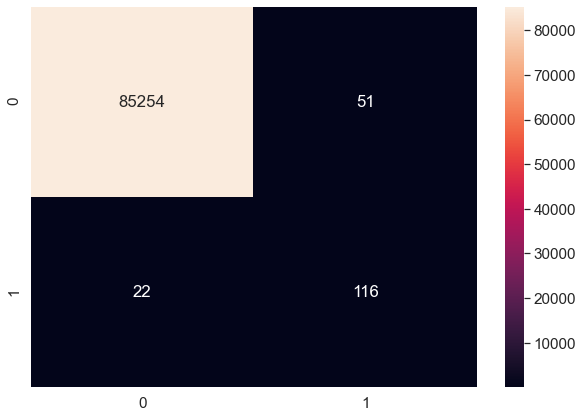

In [91]:
## Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

### Observation: We could see a slight increase in Recall value by making some simple changes in class balancing and redefining the softmax threshold

## Improvements

- We can design a custom error metric like, a*|type1 errors| + b*|type2 errors|, a>>b.                                       
Here we give different weights to errors. Type 1 error is false positives and type 2 is FN. This custom method will solve data imabalacing using weights and cost of error problem
- The performances may be improved by 
* Hyperparameter tuning
* Redefining the architecture of ANN
* Adding Dropouts and Batch normalization